<a href="https://colab.research.google.com/github/bislara/ASL-Handset-Classification/blob/master/Asl_handset_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [1]:
!ls

drive  sample_data


In [0]:
!mkdir .kaggle

In [0]:
import json

token = {"username":"biswajeetsahoo54","key":"1ce5cac341a71f094959287c3a210236"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [4]:
!cp /content/.kaggle/kaggle.json  /content/.kaggle/kaggle.json

cp: '/content/.kaggle/kaggle.json' and '/content/.kaggle/kaggle.json' are the same file


In [0]:
!cp /content/.kaggle/kaggle.json  /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
unanimad/dataisbeautiful                                    Reddit - Data is Beautiful                           11MB  2020-03-21 22:28:28            622  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)  646MB  2020-03-20 23:31:34          25843  
rubenssjr/brasilian-houses-to-rent                          brazilian_houses_to_rent                            117KB  2020-03-15 01:12:22            621  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     389KB  2020-03-23 05:12:36          73982  
kimjihoo/coronavirusdataset                                 Data

In [8]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:21<00:00, 20.5MB/s]
100% 1.03G/1.03G [00:21<00:00, 50.8MB/s]


In [9]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing191.jpg  
  inflating: asl_alphabet_t

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import os
import time
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


trainset = torchvision.datasets.ImageFolder(root = "/content/asl_alphabet_train/asl_alphabet_train", transform = transform)
testset = torchvision.datasets.ImageFolder(root = "/content/asl_alphabet_train/asl_alphabet_train", transform = transform)

num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(0.25 * num_train))
np.random.shuffle(indices)
train_idx, test_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

trainloader = torch.utils.data.DataLoader(trainset,sampler=train_sampler, batch_size=4, num_workers=4)
testloader = torch.utils.data.DataLoader(testset,sampler=test_sampler, batch_size=4, num_workers=4)

In [7]:
print(len(testloader))
print(len(trainloader))

5438
16313


In [0]:
root_path = '/content/asl_alphabet_train/asl_alphabet_train'
file_names = []
dir_names = []
root_names = []
for (root,dirs,files) in os.walk(root_path, topdown=True):
    file_names.append(files)
    dir_names.append(dirs)
    root_names.append(root)


In [0]:
classes = trainloader.dataset.classes

In [10]:
print(classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

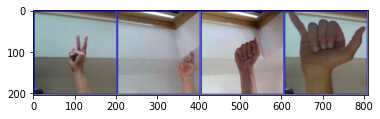

    V     X     A     Y
Input Size is  torch.Size([4, 3, 200, 200])


In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
print("Input Size is ",images.size())

In [36]:
print("classes are ",classes)

classes are  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [37]:
print(len(classes))

29


In [0]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, in_fea = 3, out_fea = len(classes)):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_fea, 12, 5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
        self.conv2 = nn.Conv2d(12, 24, 5)
        self.conv3 = nn.Conv2d(24, 36, 5)
        self.fc1 = nn.Linear(36 * 191 * 191, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, out_fea)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        # print("X size is: ",x.size())
        x = x.view(-1, 36 * 191 * 191)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [0]:
#check if cuda available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

#import the model
net = Net()
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  net = nn.DataParallel(net)
net = net.to(device)


In [0]:
step = 0
loss_train = []
loss_val = []
net = net.train()
min_loss = 100
patience = 5
training_loss_store = []
validation_loss_store = []


import torch.optim as optim

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)
file = open('/content/drive/My Drive/Asl_handset/logs_test4_epoch100_with_max_pool.txt', 'w')


In [44]:
print('training started.............................................')
file.write('training started.............................................\n')
start_time = time.time()
for epoch in range(5):  # loop over the dataset multiple times
    file.write('##############################TRAINING###############################\n')
    running_loss = 0.0
    loop_no=0
    loss_epoch=0
    for i, data in enumerate(trainloader, 0):
        step+=1
        loop_no+=1
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device),data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        #print("Input Size is ",inputs.size())
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss_epoch += loss.item()
        loss_train.append(loss.item())
        training_loss_store.append([epoch, loss.item()])
        loss.backward()
        optimizer.step()
        

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 10))
            #log_loss_summary(logger, loss_train, step, prefix = 'train_')
            file.write('epoch = '+ str(epoch + 1) + '\t' +'step = '+ str(step) +'\t'+'train_loss = '+'\t'+str(np.mean(loss_train)) +'\n')
            loss_train = []
            running_loss = 0.0

    
    print('Finished training for epoch ' + str(epoch) + ' time taken = ' + str(time.time() - start_time)+ 'With train loss of '+str(loss_epoch/float(loop_no)))
    file.write('Finished training for epoch ' + str(epoch) + ' time taken = ' + str(time.time() - start_time)+ 'With train loss of '+str(loss_epoch/float(loop_no)) + '\n')
    file.write('##################################evaluation##############################\n')
    print('################################evaluation###########################\n')
    
  
    with torch.no_grad():
        val_loss = 0
        net.eval()
        
        for i, data in enumerate(testloader, 0):
            step+=1
            inputs, labels = data[0].to(device),data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss_val.append(loss.item())
            validation_loss_store.append([epoch, loss.item()])
            val_loss += loss
            
        val_loss = val_loss/float(i + 1)
        
        if val_loss < min_loss:
            min_loss = val_loss
            no_impr_epoch = 0
            
            #save the best model
            torch.save(net.state_dict(), 'training/' + 'epoch_' + str(epoch+1) + 'loss_' + str(val_loss) + '.pt')
            
            print('performance improved with validation loss ' + str(val_loss))
            file.write('--------------------------------------------------------------------\n')
            file.write('performance improved with validation loss =  ' + str(val_loss) + '\n')
            
            file.write('epoch = '+ str(epoch + 1) + '\t' +'step = '+ str(step) +'\t'+'val_loss = '+'\t'+str(np.mean(loss_val)) +'\n')
            file.write('--------------------------------------------------------------------\n\n')
            #log_loss_summary(logger, loss_val, step, prefix="val_")
            loss_val = []
        else:
            no_impr_epoch += 1
            print('no improvement with prev best model ' + str(no_impr_epoch) + 'th')
            file.write('no improvement with prev best model ' + str(no_impr_epoch) + 'th \n')
            
        if no_impr_epoch > patience:
            print('stop training')
            file.write('stop training')
            break
    

print('Finished Training................................................')
file.write('Finished Training................................................\n')
end_time = time.time()
file.write('Training time:- ' + str(end_time - start_time))
file.close()


Streaming output truncated to the last 5000 lines.
[2, 15430] loss: 0.211
[2, 15440] loss: 0.413
[2, 15450] loss: 0.435
[2, 15460] loss: 0.232
[2, 15470] loss: 0.117
[2, 15480] loss: 0.211
[2, 15490] loss: 0.264
[2, 15500] loss: 0.491
[2, 15510] loss: 0.359
[2, 15520] loss: 0.198
[2, 15530] loss: 0.185
[2, 15540] loss: 0.148
[2, 15550] loss: 0.197
[2, 15560] loss: 0.142
[2, 15570] loss: 0.114
[2, 15580] loss: 0.032
[2, 15590] loss: 0.336
[2, 15600] loss: 0.131
[2, 15610] loss: 0.095
[2, 15620] loss: 0.221
[2, 15630] loss: 0.169
[2, 15640] loss: 0.161
[2, 15650] loss: 0.144
[2, 15660] loss: 0.103
[2, 15670] loss: 0.461
[2, 15680] loss: 0.335
[2, 15690] loss: 0.125
[2, 15700] loss: 0.392
[2, 15710] loss: 0.312
[2, 15720] loss: 0.626
[2, 15730] loss: 0.093
[2, 15740] loss: 0.278
[2, 15750] loss: 0.246
[2, 15760] loss: 0.255
[2, 15770] loss: 0.297
[2, 15780] loss: 0.127
[2, 15790] loss: 0.167
[2, 15800] loss: 0.204
[2, 15810] loss: 0.174
[2, 15820] loss: 0.180
[2, 15830] loss: 0.136
[2, 15

In [0]:
#Release all unoccupied cached memory in GPU
if(torch.cuda.is_available()):
    torch.cuda.empty_cache()


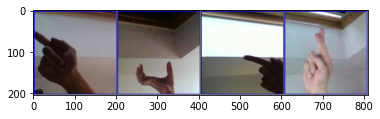

Ground Truth:      G space     G     R
Predicted:      G space     G     R


In [19]:
PATH = "training/epoch_5loss_tensor(0.0803, device='cuda:0').pt"
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
# print labels
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# show images
# import os
# print("Actual image is ",os.path.basename("/content/asl_alphabet_test/asl_alphabet_test/B_test.jpg"))

outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))


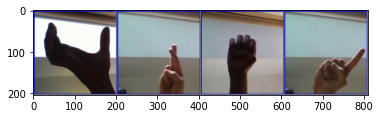

Ground Truth:  space     R     E     Z
tensor([28, 17,  4, 25])
Predicted:  space     R     E     Z
A :-  14.933059
B :-  -7.629064
C :-  -14.12897
D :-  -33.488674
E :-  14.270681
F :-  -6.015931
G :-  9.042767
H :-  -0.9489333
I :-  -13.859446
J :-  -1.0750873
K :-  -17.2054
L :-  -8.85675
M :-  5.558798
N :-  7.672912
O :-  14.848284
P :-  -3.7366538
Q :-  -7.874194
R :-  -12.188595
S :-  0.6954542
T :-  -12.888437
U :-  -0.9788447
V :-  -12.019944
W :-  -6.3237743
X :-  18.258896
Y :-  15.008854
Z :-  -14.788026
del :-  12.527536
nothing :-  -12.426785
space :-  45.21256


In [20]:
PATH = "training/epoch_5loss_tensor(0.0803, device='cuda:0').pt"
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


outputs = model(images)
_, predicted = torch.max(outputs, 1)
print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
i = outputs.detach().numpy()
#print('Scores:-', i)
for j in range(len(classes)):
    print(classes[j], ':- ', i[0, j])

In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1]
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print("Total is ",total)

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Streaming output truncated to the last 5000 lines.
Total is  1764
Total is  1768
Total is  1772
Total is  1776
Total is  1780
Total is  1784
Total is  1788
Total is  1792
Total is  1796
Total is  1800
Total is  1804
Total is  1808
Total is  1812
Total is  1816
Total is  1820
Total is  1824
Total is  1828
Total is  1832
Total is  1836
Total is  1840
Total is  1844
Total is  1848
Total is  1852
Total is  1856
Total is  1860
Total is  1864
Total is  1868
Total is  1872
Total is  1876
Total is  1880
Total is  1884
Total is  1888
Total is  1892
Total is  1896
Total is  1900
Total is  1904
Total is  1908
Total is  1912
Total is  1916
Total is  1920
Total is  1924
Total is  1928
Total is  1932
Total is  1936
Total is  1940
Total is  1944
Total is  1948
Total is  1952
Total is  1956
Total is  1960
Total is  1964
Total is  1968
Total is  1972
Total is  1976
Total is  1980
Total is  1984
Total is  1988
Total is  1992
Total is  1996
Total is  2000
Total is  2004
Total is  2008
Total is  2012
Tota

In [24]:
class_correct = list(0. for i in range(29))
class_total = list(0. for i in range(29))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1]
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels)
        print(c,labels)
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

#file = open('result_logs.txt', 'w')
for i in range(29):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))
    #file.write('Accuracy of' + classes[i] + ':' + '\t' + str(100 * class_correct[i] / class_total[i]) +'%'+'\n')
    

Streaming output truncated to the last 5000 lines.
tensor([ True, False,  True,  True]) tensor([ 0, 20, 17,  6])
tensor([True, True, True, True]) tensor([15,  7, 10,  2])
tensor([True, True, True, True]) tensor([7, 6, 6, 7])
tensor([True, True, True, True]) tensor([ 5, 19, 28, 19])
tensor([True, True, True, True]) tensor([ 0, 20, 23, 11])
tensor([True, True, True, True]) tensor([ 2,  4, 28, 10])
tensor([True, True, True, True]) tensor([15,  2,  5,  7])
tensor([True, True, True, True]) tensor([ 9,  9,  0, 26])
tensor([True, True, True, True]) tensor([18,  8,  7,  9])
tensor([ True, False,  True,  True]) tensor([ 4,  2, 10, 25])
tensor([True, True, True, True]) tensor([16, 10, 14, 22])
tensor([True, True, True, True]) tensor([ 7, 18,  9, 19])
tensor([True, True, True, True]) tensor([ 9, 14, 13, 18])
tensor([True, True, True, True]) tensor([16, 23, 16,  5])
tensor([True, True, True, True]) tensor([ 4, 22, 19,  8])
tensor([True, True, True, True]) tensor([ 3, 18, 18, 14])
tensor([True, Tru

IndexError: ignored

In [0]:
file.close()